In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [3]:
file = open('/content/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

In [4]:
 process_list = []
 for i,line in enumerate(lines):
   try:
     line = line.split(',')
     last = line[5].split(';')[0]
     last = last.strip()
     if last == '':
       break;
     temp = [line[0],line[1],line[2],line[3],line[4],last]
     process_list.append(temp)
   except:
      print('Error at line ',i)
    


Error at line  281873
Error at line  281874
Error at line  281875


In [5]:
process_list

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [6]:
columns = ['user','activity','time','x','y','z']

In [7]:
data = pd.DataFrame(data= process_list,columns=columns)

In [8]:
data.shape

(343416, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['activity'].value_counts()

Walking       49756
Jogging       31569
Downstairs    13537
Upstairs      11844
Name: activity, dtype: int64

In [10]:
data['x'] = data['x'].astype('float')

In [11]:
data['y'] = data['y'].astype('float')

In [12]:
data['z'] = data['z'].astype('float')

In [14]:
def plot_activity(activity,data):
  fig,(ax0,ax1,ax2)=plt.subplots(nrows=3,figsize=(15,7),sharex=True)
  plot_axis(ax0,data['time'],data['x'],'X-Axis')
  plot_axis(ax1,data['time'],data['y'],'Y-Axis')
  plot_axis(ax2,data['time'],data['z'],'Z-Axis')
  plt.subplots_adjust(hspace=0.2)
  fig.subplots_adjust(top=0.90)
  plt.show()


In [15]:
def plot_axis(ax,x,y,title):
  ax.plot(x,y,'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) -np.std(y),max(y)+np.std(y) ])
  ax.set_xlim([min(x),max(x)])
  ax.grid(True)

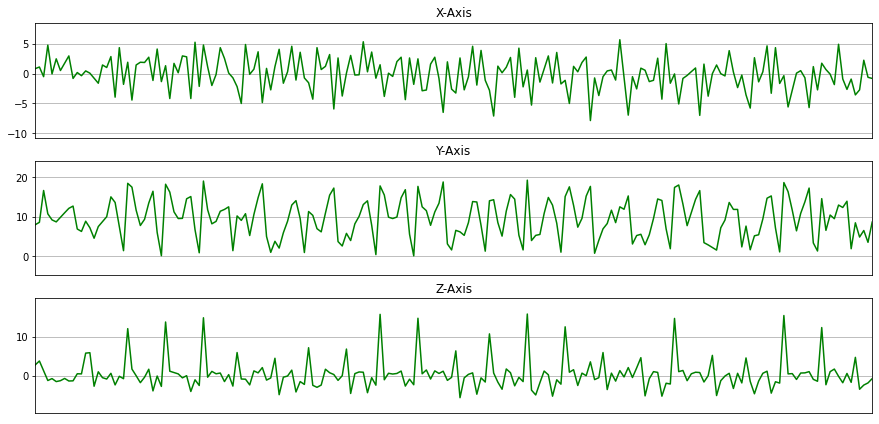

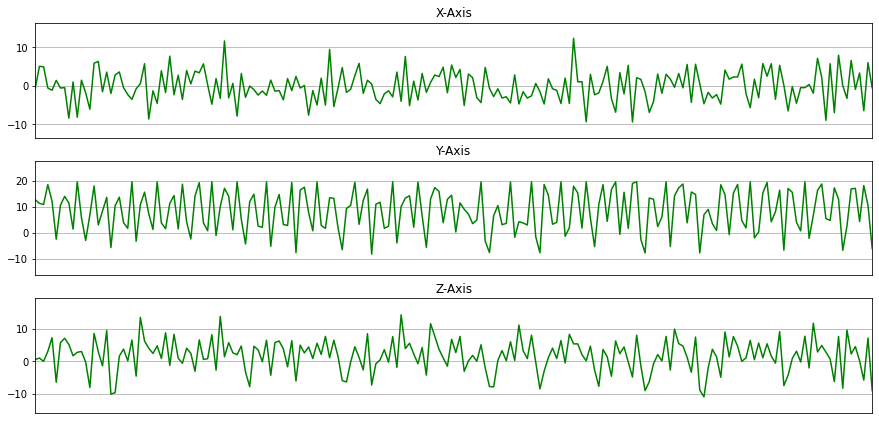

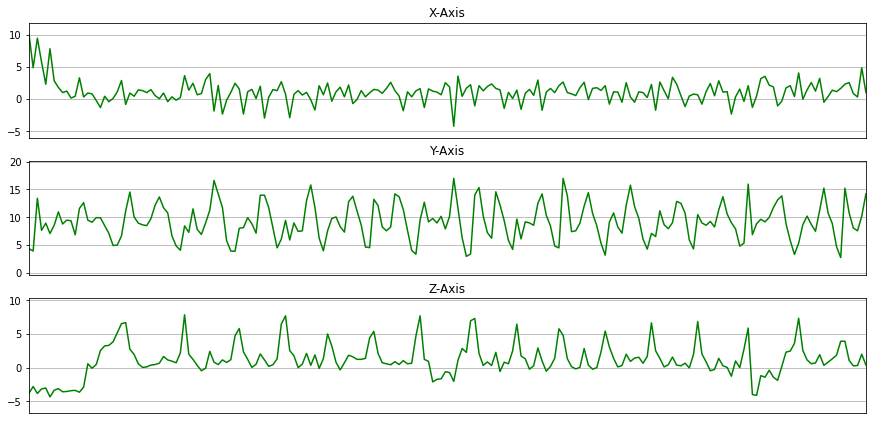

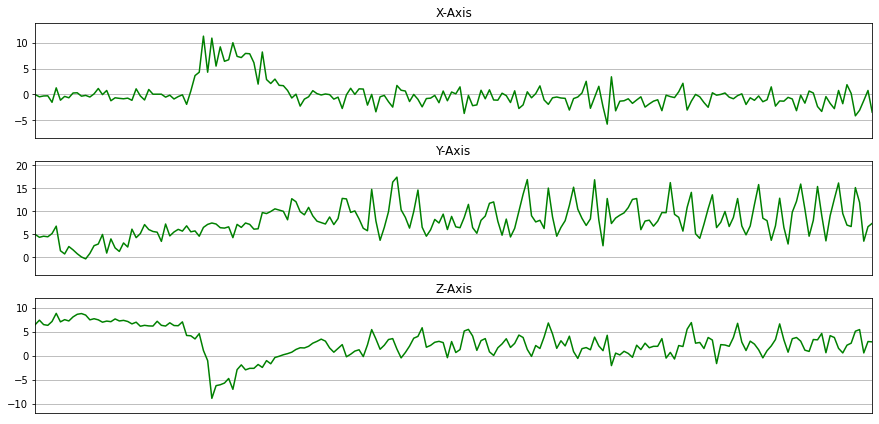

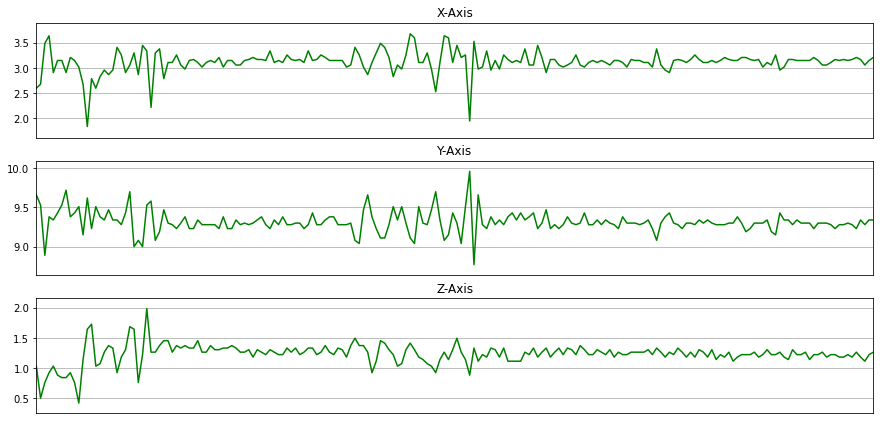

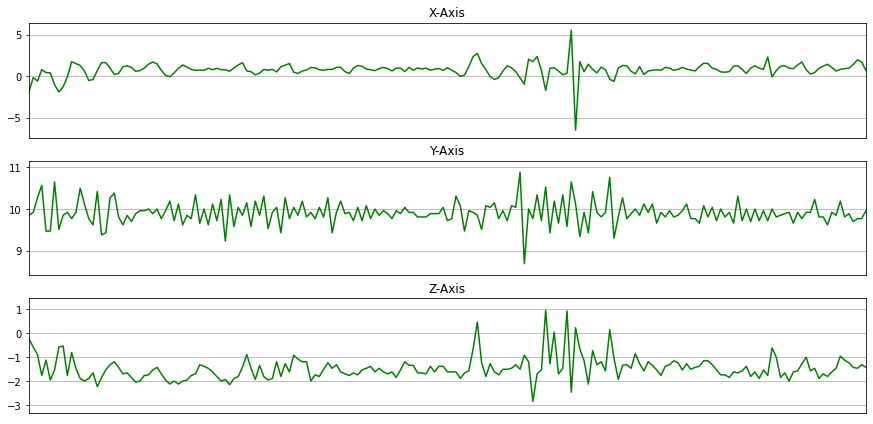

In [18]:
for activity in activities:
  data_for_plot = data[(data['activity']== activity )][:fs*10]
  plot_activity(activity,data_for_plot)

In [17]:
fs=20

In [16]:
activities = data['activity'].value_counts().index

In [19]:
df = data.drop(['user','time'],axis=1)
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [20]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [21]:
Walking = df[df['activity']=='Walking'].head(3555).copy()

In [22]:
Jogging = df[df['activity']=='Jogging'].head(3555).copy()

In [23]:
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()

In [24]:
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()

In [25]:
Sitting = df[df['activity']=='Sitting'].head(3555).copy()

In [26]:
balanced_data = pd.DataFrame()

In [29]:
balanced_data=balanced_data.append([Walking,Jogging,Downstairs,Upstairs,Sitting,Standing])
balanced_data

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638
...,...,...,...,...
257318,Standing,-0.910000,9.430000,2.533385
257319,Standing,-1.180000,9.510000,2.492524
257320,Standing,-1.500000,9.530000,2.533385
257321,Standing,-2.070000,8.770000,2.179256


In [28]:
Standing = df[df['activity']=='Standing'].head(3555).copy()

In [30]:
balanced_data.shape

(21330, 4)

In [31]:
balanced_data

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638
...,...,...,...,...
257318,Standing,-0.910000,9.430000,2.533385
257319,Standing,-1.180000,9.510000,2.492524
257320,Standing,-1.500000,9.530000,2.533385
257321,Standing,-2.070000,8.770000,2.179256


In [32]:
balanced_data['activity'].value_counts()

Jogging       3555
Sitting       3555
Standing      3555
Upstairs      3555
Downstairs    3555
Walking       3555
Name: activity, dtype: int64

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [36]:
pip install scikit-learn

/bin/bash: pip: command not found


In [41]:
label = LabelEncoder()
balanced_data['label']= label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [42]:
x = balanced_data[['x','y','z']]
y = balanced_data['label']

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
scaled_x= pd.DataFrame(data=X,columns=['x','y','z'])
scaled_x['label'] = y.values
scaled_x

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


In [44]:
import scipy.stats as stats

In [45]:
fs=20
frame_size = fs*4
hop_size = fs*2

In [48]:
def get_frames(df,frame_size,hop_size):
  n_features = 3
  frames = []
  labels = []
  for i in range(0,len(df)-frame_size,hop_size):
    x = df['x'].values[i:i+frame_size]
    y = df['y'].values[i:i+frame_size]
    z = df['z'].values[i:i+frame_size]
    label = stats.mode(df['label'][i:i+frame_size])[0][0]
    frames.append([x,y,z])
    labels.append(label)
  frames=np.asarray(frames).reshape(-1,frame_size,n_features)
  labels = np.asarray(labels)
  return frames,labels



In [49]:
x,y = get_frames(scaled_x,frame_size,hop_size)

In [50]:
x

array([[[ 5.03429609e-04,  7.35899668e-02, -3.61274948e-01],
        [ 1.06025830e+00, -2.37027830e-01,  4.42677021e-01],
        [-8.35460960e-02,  2.45343354e-01,  5.74232736e-01],
        ...,
        [-3.90728982e-01, -8.31974487e-01, -4.79787710e-01],
        [ 1.53617805e+00, -1.82376484e+00, -3.21910879e-01],
        [-1.96419032e-01, -2.16659658e-01, -1.76709113e+00]],

       [[ 1.06756698e+00,  8.08986222e-02, -7.59596607e-01],
        [-2.66262447e-01,  9.46974239e-01,  4.60948619e-01],
        [-1.96830232e-01, -4.12435519e-01, -8.10757194e-01],
        ...,
        [-1.50396308e+00,  3.02759142e-02, -2.53092776e-01],
        [-1.24488310e+00, -6.05279552e-01, -9.25081337e-01],
        [ 4.18769916e+00, -1.57278121e+00, -1.93711227e+00]],

       [[ 7.49640518e-01, -4.30707171e-01,  1.75911115e-01],
        [-1.25293075e+00, -2.04138885e-01, -3.50311967e-01],
        [ 3.18429880e-01,  5.15763521e-01, -1.39910394e+00],
        ...,
        [-1.10724696e+00,  3.85575285e+00,

In [51]:
y

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify = y)

In [55]:
x_train = x_train.reshape(425,80,3,1)
x_test = x_test.reshape(107,80,3,1)

In [58]:
model = Sequential()
model.add(Conv2D(16, (2,2),activation='relu',input_shape= x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2,2),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))


In [61]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
14/14 [==============================] - 33s 28ms/step - loss: 1.6262 - accuracy: 0.3034 - val_loss: 1.1724 - val_accuracy: 0.6355
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 1.1275 - accuracy: 0.6095 - val_loss: 0.7734 - val_accuracy: 0.7477
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.7782 - accuracy: 0.7610 - val_loss: 0.5065 - val_accuracy: 0.8131
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5500 - accuracy: 0.8249 - val_loss: 0.4167 - val_accuracy: 0.8224
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4338 - accuracy: 0.8695 - val_loss: 0.3484 - val_accuracy: 0.8598
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3761 - accuracy: 0.8730 - val_loss: 0.3244 - val_accuracy: 0.8785
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3253 - accuracy: 0.8824 - val_loss: 0.2852 - val_accuracy: 0.8785
Epoch 8/10
14/14 [

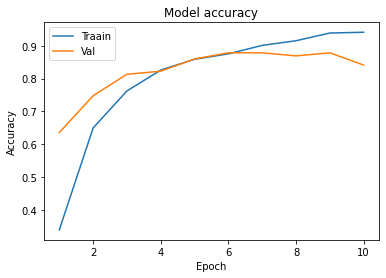

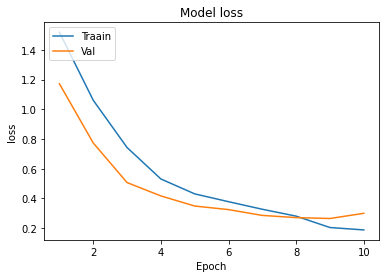

In [63]:
def plot_learningCurve(history,epochs):
  epoch_range = range(1,11)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Traain','Val'],loc='upper left')
  plt.show()
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Traain','Val'],loc='upper left')
  plt.show()
plot_learningCurve(history,10)

In [64]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
